In [278]:
import pandas as pd


In [279]:
df = pd.read_csv("sleep_data.csv")

In [280]:
df.head()

,Date,Slept,Got up,Duration,How quickly fell asleep,How easy got up,How felt afterwards
0,21.10.2017,23:30,05:00,5.50,4.5,4.5,4.0
1,21.10.2017,11:45,12:10,0.42,4.5,3.5,4.5
2,22.10.2017,23:00,05:00,6.00,3.5,3.0,3.0
3,22.10.2017,06:05,09:05,3.00,4.0,4.5,5.0
4,22.10.2017,14:25,15:50,1.42,3.5,2.5,4.5


In [281]:
print(df.describe())

print(df.shape)

         Duration  How quickly fell asleep  How easy got up  \
count  166.000000               166.000000       166.000000   
mean     4.222229                 4.310241         4.093373   
std      2.643161                 0.741712         0.846750   
min      0.250000                 2.500000         2.000000   
25%      1.340000                 4.000000         3.500000   
50%      5.025000                 4.500000         4.500000   
75%      5.980000                 5.000000         5.000000   
max     10.250000                 5.000000         5.000000   

       How felt afterwards  
count           166.000000  
mean              4.259036  
std               0.695707  
min               2.000000  
25%               4.000000  
50%               4.500000  
75%               5.000000  
max               5.000000  
(166, 7)


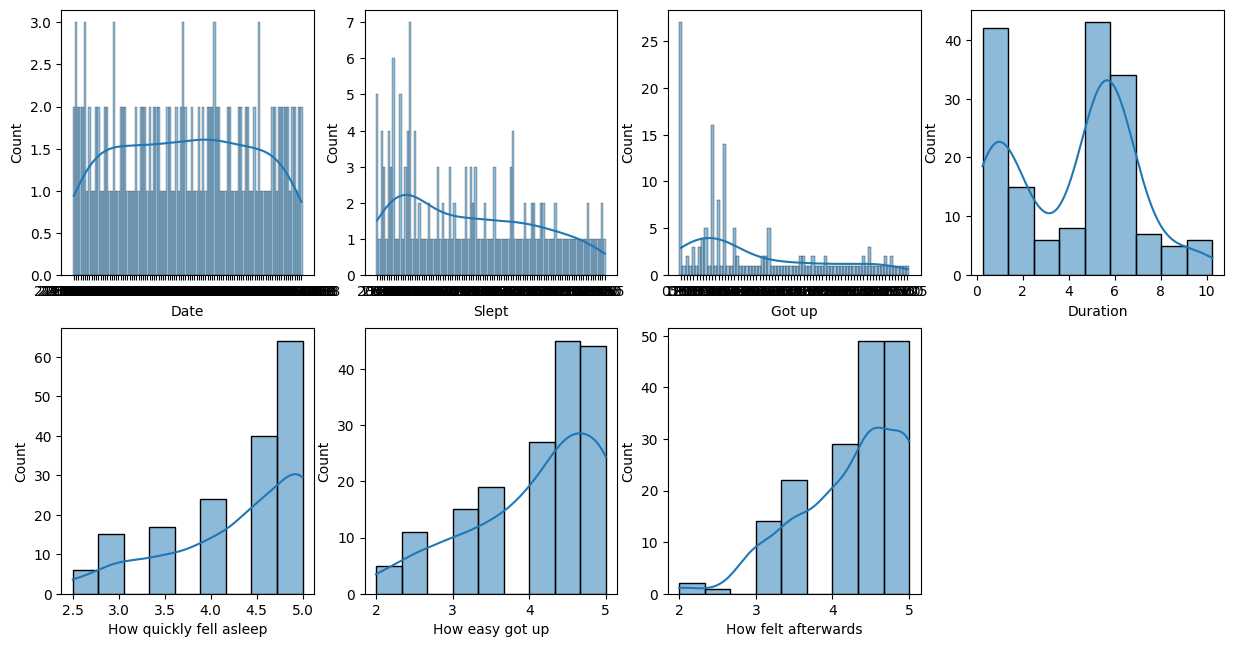

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 20))

for i in range(1, len(df.columns) + 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[df.columns[i - 1]], kde=True)

In [283]:

print(df.head())

         Date  Slept Got up  Duration  How quickly fell asleep  \
0  21.10.2017  23:30  05:00      5.50                      4.5   
1  21.10.2017  11:45  12:10      0.42                      4.5   
2  22.10.2017  23:00  05:00      6.00                      3.5   
3  22.10.2017  06:05  09:05      3.00                      4.0   
4  22.10.2017  14:25  15:50      1.42                      3.5   

   How easy got up  How felt afterwards  
0              4.5                  4.0  
1              3.5                  4.5  
2              3.0                  3.0  
3              4.5                  5.0  
4              2.5                  4.5  


In [284]:
from datetime import datetime
import numpy as np

df["Slept"] = pd.to_datetime(df["Slept"]).dt.strftime('%H:%M:%S')

#df["Slept"] = pd.to_timedelta(df["Slept"])


C:\Users\phili\AppData\Local\Temp\ipykernel_3892\3393270851.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Slept"] = pd.to_datetime(df["Slept"]).dt.strftime('%H:%M:%S')


In [285]:
##df["Slept"] = df["Slept"].astype(float)
df["Slept"] = pd.to_timedelta(df["Slept"]).dt.total_seconds().astype(int)

df.head

<bound method NDFrame.head of            Date  Slept Got up  Duration  How quickly fell asleep  \
0    21.10.2017  84600  05:00      5.50                      4.5   
1    21.10.2017  42300  12:10      0.42                      4.5   
2    22.10.2017  82800  05:00      6.00                      3.5   
3    22.10.2017  21900  09:05      3.00                      4.0   
4    22.10.2017  51900  15:50      1.42                      3.5   
..          ...    ...    ...       ...                      ...   
161  29.01.2018   3000  05:50      5.00                      3.0   
162  30.01.2018    900  05:25      5.17                      4.0   
163  30.01.2018  22500  08:50      2.58                      4.0   
164  31.01.2018    300  05:28      5.38                      5.0   
165  31.01.2018  30600  09:05      0.58                      4.5   

     How easy got up  How felt afterwards  
0                4.5                  4.0  
1                3.5                  4.5  
2                3.0 

In [286]:
#df['Slept_minutes'] = df['Slept'].dt.hour * 60 + df['Slept'].dt.minute
#df['Got_up_minutes'] = df['Got up'].dt.hour * 60 + df['Got up'].dt.minute

#print(df)


In [287]:
df["How felt afterwards"] = df["How felt afterwards"].astype(int)

y = df["How felt afterwards"]
x = df.drop(["How felt afterwards", "Date", "Got up"], axis=1)

y.head

<bound method NDFrame.head of 0      4
1      4
2      3
3      5
4      4
      ..
161    4
162    5
163    4
164    4
165    5
Name: How felt afterwards, Length: 166, dtype: int32>

In [288]:
from sklearn.preprocessing import MinMaxScaler

# df is your DataFrame and you want to normalize specific columns
columns_to_normalize = ['How quickly fell asleep', 'How felt afterwards', "How easy got up"]  # Adjust this list with your column names

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the specified columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Print the DataFrame to verify the changes
print(df)



           Date  Slept Got up  Duration  How quickly fell asleep  \
0    21.10.2017  84600  05:00      5.50                      0.8   
1    21.10.2017  42300  12:10      0.42                      0.8   
2    22.10.2017  82800  05:00      6.00                      0.4   
3    22.10.2017  21900  09:05      3.00                      0.6   
4    22.10.2017  51900  15:50      1.42                      0.4   
..          ...    ...    ...       ...                      ...   
161  29.01.2018   3000  05:50      5.00                      0.2   
162  30.01.2018    900  05:25      5.17                      0.6   
163  30.01.2018  22500  08:50      2.58                      0.6   
164  31.01.2018    300  05:28      5.38                      1.0   
165  31.01.2018  30600  09:05      0.58                      0.8   

     How easy got up  How felt afterwards  
0           0.833333             0.666667  
1           0.500000             0.666667  
2           0.333333             0.333333  
3      

In [289]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# X contains features and y contains labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Instantiate the Linear SVC model
model = LinearSVC()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.3235294117647059


C:\Users\phili\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\phili\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


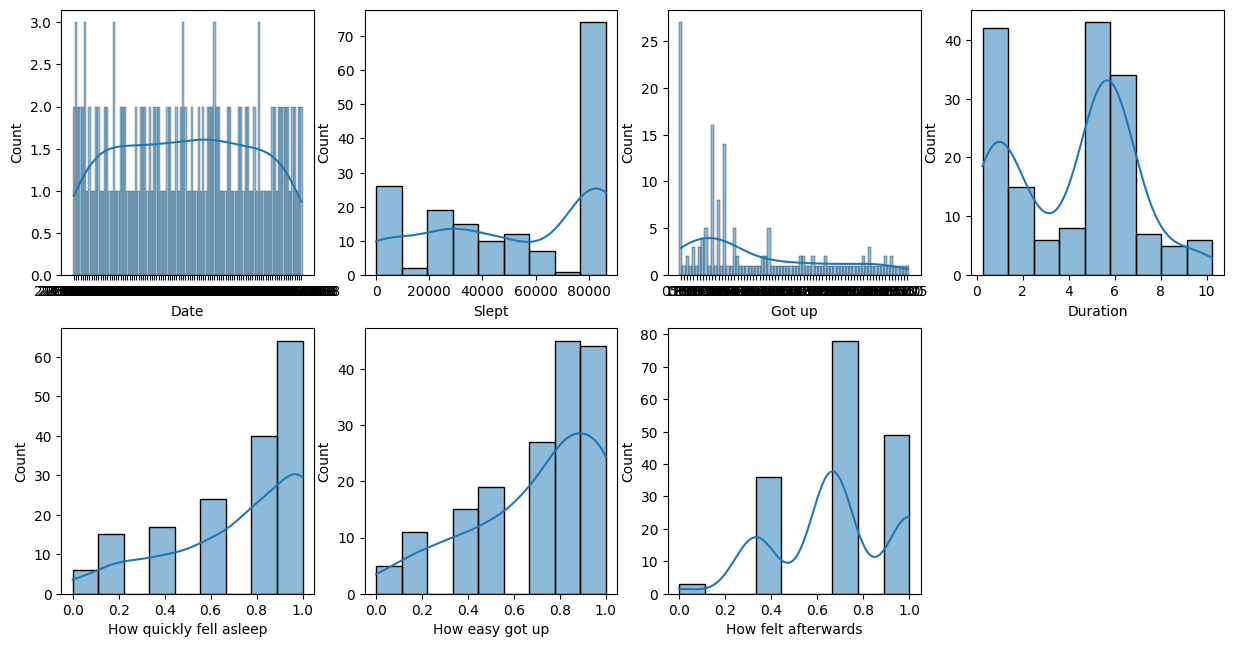

In [290]:
plt.figure(figsize=(15, 20))

for i in range(1, len(df.columns) + 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[df.columns[i - 1]], kde=True)

In [291]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [292]:
model = SVC(kernel='poly')
model.fit(X_train, y_train)


SVC(kernel='poly')

In [293]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4117647058823529


In [294]:
from sklearn.ensemble import RandomForestClassifier  # For classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

In [295]:
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [296]:
accuracy1 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy1)

Accuracy: 0.38235294117647056
